- Student 1 Name: Jakub Kwasniak
- Student 2 Name: Murshed SK

change the name of this notebook to  `name_1_name_2_notebook_??.ipynb` with *no spaces, no accents and no strange characters!* and where `??` stands for the number of the notebook you are working on.

# M1 PPM -- Numerical Methods for Physics

# Numerical methods: basics and linear regression

# Numbers, approximations and errors

Import the needed packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

C:\Users\okwas\AppData\Local\Temp\ipykernel_8076\2188812682.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Write a program that determines the underflow and overflow limits

In [3]:
# Note: here, by both underflow and overflow limit we mean the limiting values that can be achieved by dividing
# and multiplying a given number, respectively.

# Underflow limit - keep dividing the number until it becomes 0
# Initialise the required variables
var = np.pi
div = 10 # arbitrary divisor
mul = 10 # arbitrary multiplier

underflow = var/div
underflow_arr = np.array([])

# Continue dividing the result until it reaches zero
while underflow != 0:
    underflow = underflow/div
    underflow_arr = np.append(underflow_arr, underflow)

print("Underflow limit for {:.2f} by dividing it by {} = {}".format(var, div, underflow_arr[-2]))

# Overflow limit - keep multiplying the number until it becomes INF
overflow = var * mul
overflow_arr = np.array([])

while overflow != float('inf'):
    overflow = overflow * mul
    overflow_arr = np.append(overflow_arr, overflow)
    
print("Overflow limit for {:.2f} by multiplying it by {} = {:}".format(var, div, overflow_arr[-2]))

Underflow limit for 3.14 by dividing it by 10 = 5e-324
Overflow limit for 3.14 by multiplying it by 10 = 3.1415926535897913e+307


### Write a program to determine the machine precision (within a factor of two)

Machine precision, $\epsilon_m$ is the maximum positive number that can be added to 1, without changing its value
$$ 1 + \epsilon_m \rightarrow 1$$

In [4]:
# Initialise the necessary variables within double precision (64-bits)
epsilon = np.float64(1) # Machine precision
comp = np.float64(1) + epsilon # Comparison expression -> needs to be equal 1 

# Iterate until we reach unity
while comp != 1:
    epsilon = epsilon/np.float64(2) # reduce the precision by a factor of two
    comp = np.float64(1) + epsilon
    
print(r"The machine precision epsilon_m is {}".format(epsilon))

The machine precision epsilon_m is 1.1102230246251565e-16


### Explore subtractive cancellation

Consider the functions:
$$f(x)=\frac{1-\sqrt{1-t(x)^2}}{t(x)}$$  where $$t(x)=e^{-\pi x}$$

- plot the function $f(x)$ for $x$ in the range $[5,7]$

Rewrite the function $f(x)$ as

$$ \frac{t(x)}{1+\sqrt{1-t(x)^2}} $$

- plot on the same graph the two functions and comment

- label the axes

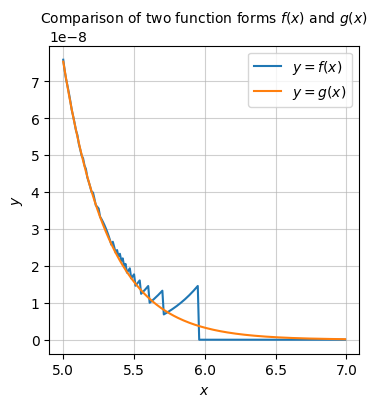

In [5]:
def t(x: float) -> float:
    """Compute the value of the function t for a given value x.
    Parameters:
    x (float): argument of t
    
    Returns:
    t(x) (float)"""
    return np.exp(-np.pi * x)

def f(x: float) -> float:
    """Compute the value of the function f for a given value x.
    Parameters:
    x (float): argument of f
    
    Returns:
    f(x) (float)"""
    return (1 - np.sqrt(1 - t(x)*t(x)))/t(x)

# Rewrite the function
def g(x: float) -> float:
    """Compute the value of the function g for a given value x.
    Parameters:
    g (float): argument of g
    
    Returns:
    g(x) (float)"""
    return t(x)/(1 + np.sqrt(1 - t(x) * t(x)))

# Set the range of x
x = np.arange(5, 7, 0.01)

# Plot
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.title(r"Comparison of two function forms $f(x)$ and $g(x)$", fontsize=10)
plt.plot(x, f(x), label="$y=f(x)$")
plt.plot(x, g(x), label="$y=g(x)$")
plt.grid(alpha=0.6)
plt.legend()
plt.show()

Given the previous findings about the machine precision, we can say that an arbitrary number $x$ can be represented in a computer representation $x_c$ with a certain error $\epsilon_x$ (with $|\epsilon_x | <\epsilon_m$), such that
$$ x_c = x(1 \pm \epsilon_x)$$
When performing calculations, these errors do not necessarily cancel out and may lead to deviations from the expected values of the simulation.

We can see that the plot of the function $f(x)$ is displaying noticeable spikes in the values around the interval $x \in [5.5, 6]$. On the other hand, the plot of the function $g(x)$ seems to be perfectly smooth and free of defects. Even though the only thing that changed is the form in which the function is written, it seemingly reduced the error in the plot. This is due to the fact that the function $f(x)$ includes a subtraction in the numerator $1 - \sqrt{1 - t(x)^2}$, which yields an incorrect result because of the compounded effect of the aforementioned errors.

If we let $a \equiv b-c$, such that $b \equiv 1$ and $ c \equiv \sqrt{1 - t(x)^2}$, we note that in the 'problematic' interval, $b \approx c$. Therefore, the error in the numerator $a$ will be evident in the computer representation $a_c$
$$a_c = a\left(1+\frac{b}{a}(\epsilon_b - \epsilon_c)\right),$$
where $\epsilon_b$ and $\epsilon_c$ are the errors in $b$ and $c$, respectively.

By rewriting $f(x)$ into the $g(x)$ form, we get eliminate this subtraction for the sake of $1 + \sqrt{1 - t(x)^2}$ in the denominator. 

# Linear regression

### Linear regression on simple data sets

- Write a function that given the input data returns the fitting parameters $a_0$ and $a_1$. The function template is:

```python
def lin_reg(x_data, y_data):
    """Function documentation"""
    

    return (a0, a1)
```

- Test your function on a simple set of data: plot the data and the fitted function

LSQ regression: slope=1.235, intercept=0.635
Scipy's linregress: slope=1.235, intercept=0.635


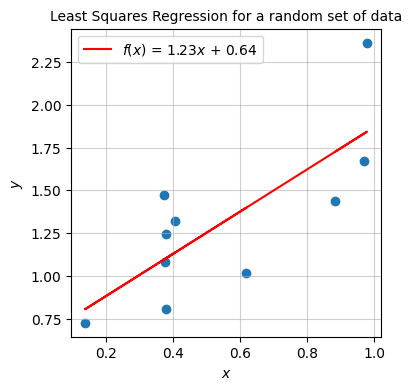

In [6]:
def lin_reg(x_data: np.ndarray, y_data: np.ndarray) -> float:
    """Compute the fitting parameters a_1 and a_2 for a given set of x- and y-values, assuming linear regresion
    y = a_1x + a_0.
    Parameters: 
    x_data (np.ndarray): array of values of x
    y_data (np.ndarray): array of values of y

    Returns:
    a_1 (float): slope of the function
    a_0 (float): y-intercept of the function
    """

    # Compute necessary metrics
    x_mean = np.sum(x_data)/x_data.size # Average of x values
    y_mean = np.sum(y_data)/y_data.size # Average of y values
    
    # Compute the sums
    s_1 = np.sum(x_data*y_data) - x_data.size*x_mean*y_mean
    s_2 = np.sum(x_data*x_data) - x_data.size*x_mean*x_mean
    
    # Compute the fitting parameters
    a_1 = s_1/s_2 # slope
    a_0 = y_mean - a_1 * x_mean # intercept

    return a_1, a_0

# Test values taken from Scipy linregress example (for comparison reasons) 
# [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html]

rng = np.random.default_rng()
x = rng.random(10)
y = 1.6*x+rng.random(10)

# LSQ regression
a_1, a_0 = lin_reg(x, y)

# Scipy regression
res = stats.linregress(x,y)

print("LSQ regression: slope={:.3f}, intercept={:.3f}".format(a_1, a_0))
print("Scipy's linregress: slope={:.3f}, intercept={:.3f}".format(res.slope, res.intercept))

# Plot the data and the fitted function
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
plt.title("Least Squares Regression for a random set of data", fontsize=10)
plt.scatter(x,y)
plt.plot(x, a_1*x+a_0, color='r', label=r'$f(x)$ = {:.2f}$x$ + {:.2f}'.format(a_1, a_0))
plt.grid(alpha=0.6)
plt.legend()
plt.show()

### Linear regression on solar wind data

We are now going to perform a linear regression fitting on measurements of the solar wind from the spacecraft [ULYSSE](https://en.wikipedia.org/wiki/Ulysses_(spacecraft)).

- The solar wind data is in the file `ulysse.txt` in the `data/` folder. The data file contains three columns
    1. First column: the heliocentric distance in AU (astronomical units), $r$
    2. Second column: the solar wind density in m$^{-3}$, $n(r)$
    3. Third column: the temperature in Kelvin, $T(r)$
    
- load and plot the data (always label your plots and put the units!!)

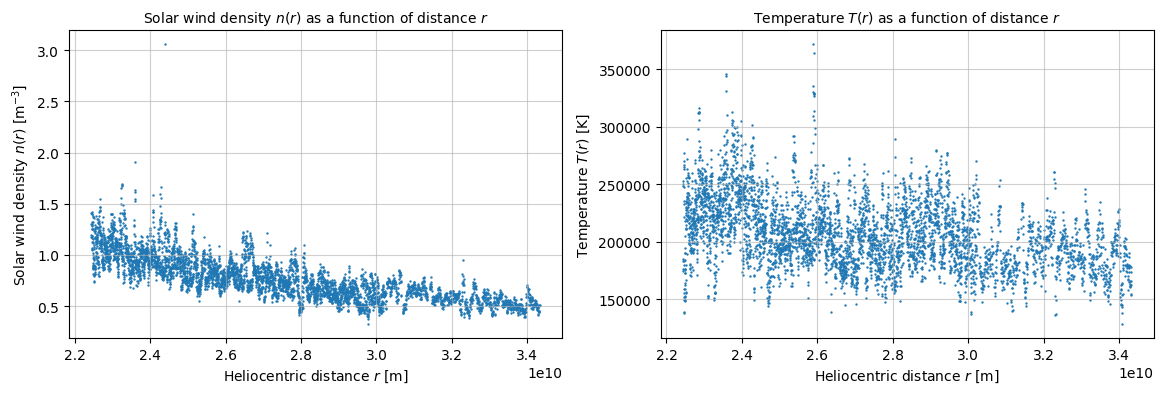

In [12]:
# Load the data from .txt
data = pd.read_csv("data/ulysse.txt", sep=" ", header=None)

# Separate the columns for each variable
r_au = data[0] # heliocentric distance [AU]

# Convert the distance to [m]
r_m = r_au * 1.496e10+11 

n = data[1] # solar wind density [m^{-3}]
temp = data[2] # temperature [K]

# Plot the relevant data
fig, axes = plt.subplots(1,2, figsize=(14,4))

# Set labels
for ax in axes: ax.set_xlabel(r"Heliocentric distance $r$ [m]")
for ax in axes: ax.grid(alpha = 0.6)
axes[0].set_ylabel(r"Solar wind density $n(r)$ [m$^{-3}$]")
axes[0].set_title(r"Solar wind density $n(r)$ as a function of distance $r$", fontsize=10)
axes[1].set_ylabel(r"Temperature $T(r)$ [K]")
axes[1].set_title(r"Temperature $T(r)$ as a function of distance $r$", fontsize=10)

# Scatter the data
axes[0].scatter(r_m, n, s=0.5)
axes[1].scatter(r_m, temp, s=0.5)

plt.show()

The solar wind is "well" approximated as steady-state, spherically symmetric expanding plasma sphere. The expected density as a function of heliocentric distance is: $$n(r) = \alpha r^{-2}$$
 - From conservation of mass and momentum, can you show why it is so? -> (Not necessary due to lack of fluid mechanics)
 - Fit the satellite data...be careful, you want to do a linear regression on a power law data.
 - Plot the data and your fit.
     - Would you conclude that the solar wind density distribution is as "expected"?

Since we are considering a linear regression, we need to operate on logarithms of the data
$$ \log n(r) = \log(\alpha r^{-2}),$$
$$ \log n(r) = \log(\alpha) - 2\log(r).$$
In order for the fit to be consistent with the data, we expect to obtain $a_1 = -2$ and $a_0 = \log(\alpha)$, after fitting the proper data.

The slope of the fit is -1.908, which is approximately what we expected!


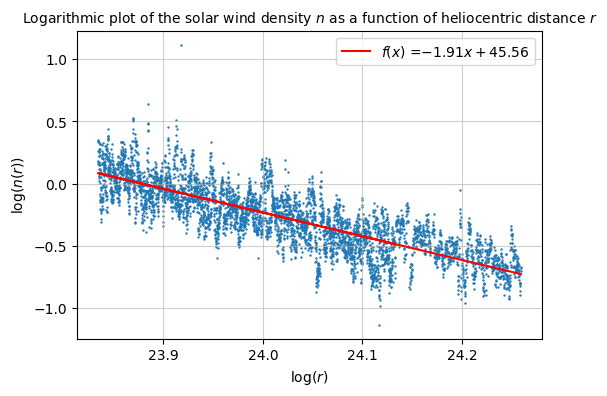

In [13]:
# Convert the n_data and r_data by taking its (natural) logarithm 
n_log = np.log(n)
r_m_log = np.log(r_m)

# Perform the fit
a_1, a_0 = lin_reg(x_data = r_m_log, y_data = n_log)

print("The slope of the fit is {:.3f}, which is approximately what we expected!".format(a_1))

# Plot the data and the fit
fig, ax = plt.subplots(figsize=(6,4))
# Set labels
ax.set_xlabel(r"$\log(r)$")
ax.set_ylabel(r"$\log(n(r))$")
plt.title(r"Logarithmic plot of the solar wind density $n$ as a function of heliocentric distance $r$", fontsize=10)

plt.scatter(r_m_log, n_log, s=0.5)
plt.plot(r_m_log, a_1*r_m_log+a_0, color='r', label=r"$f(x)$ =${:.2f}x+{:.2f}$".format(a_1, a_0))
plt.grid(alpha=0.6)
plt.legend()
plt.show()

Assuming the solar wind to behave as a perfect gas ($\gamma = 5/3$), the pressure is then given by: $$P(r) = k_{B} n(r) T(r)$$

 - By fitting the pressure data as function of distance, show that the solar wind expansion is neither adiabatic nor isothermal

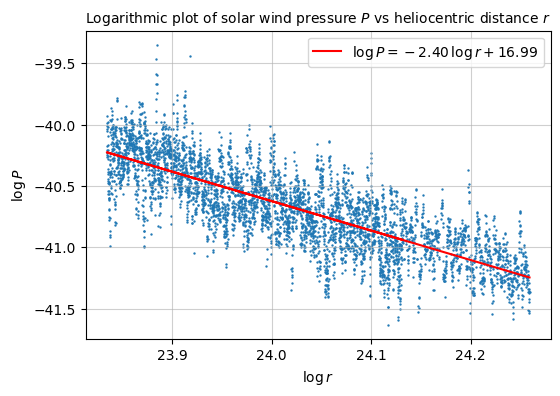

In [14]:
# Calculate the pressure data
kb = 1.380649e-23 # Boltzmann constant in SI units
press = kb * n * temp
press_log = np.log(press)

# Fit the pressure data as a function of distance
a_1, a_0 = lin_reg(x_data = r_m_log, y_data = press_log)

# Plot the data
fig, ax = plt.subplots(figsize=(6,4))
# Label axes
ax.set_xlabel("$\log r$")
ax.set_ylabel(r"$\log P$")
plt.title(r"Logarithmic plot of solar wind pressure $P$ vs heliocentric distance $r$", fontsize=10)

plt.scatter(r_m_log, press_log, s=0.5)
plt.plot(r_m_log, a_1*r_m_log + a_0, color='r', label=r"$\log P = {:.2f}\,\log r + {:.2f}$".format(a_1, a_0))
plt.grid(alpha=0.6)
plt.legend()
plt.show()

For an isothermal process, by definition, the temperature of the system remains constant throughout the process, such that if
$$ PV \propto T \equiv C = \text{const.}$$
$$ \implies P = \frac{C}{V} \propto Cr^{-3}$$
By taking the logarithm of both sides, we expect
$$ \log P = -3 \log{r} + \log C',$$
such that the slope of the graph is $-3$. What we find from the data fit is that the slope is approximately $-2.4$, implying that the process is **not isothermal**.

On the other hand, for an adiabatic process, we expect
$$ PV^\gamma \equiv C = \text{const}.,$$
where $\gamma \equiv 5/3$ for an ideal gas asssumption. Rearranging and taking the logarithm of both sides again
$$ P = CV^{-\gamma} \propto Cr^{-3\gamma}$$
$$ \log P = -3\gamma\log r + \log C',$$
implying that the slope of the graph must be $-3\cdot 5/3 = -5$. After consulting the data, the slope of the graph is $-2.4$, which indicates that this process is **not adiabatic** either.